<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Customers_Segmentation_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [71]:
df=("/content/drive/My Drive/Colab Notebooks/Mall Clustering/Mall_Customers.csv")

In [72]:
data=pd.read_csv(df)

In [73]:
#Customer ID: Id of customer, this field will be dropped as it's not useful
#Gender: customer gender - female / male
#Age: age of customer, we've got customers with age from 18 to 70 years
#Annual Income: income of customer, will be renamed to income only, values from 13 to 137
#Spending Score: Score assigned by the mall based on customer behavior and spending nature, values from 1 to 99


In [74]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [75]:
data=data.drop('CustomerID', axis=1)

In [76]:
data.columns=["Gender","Age","Income","Score"]

In [77]:
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [78]:
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [79]:
#Data Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [80]:
data.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

In [81]:
data.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

In [82]:
df=data.copy()

In [83]:
#Exploratory Data Analysis

#This dataset contains task to find hidden patterns and some cool stuff about the data, so let's just try to find something based on different visualizations!
#Distribution difference based on gender
#Is there any significant difference based on gender on features Age, Income or Score? You will find there is nothing significant except slightly more females in age around 28 and slightly more females with score around 50.


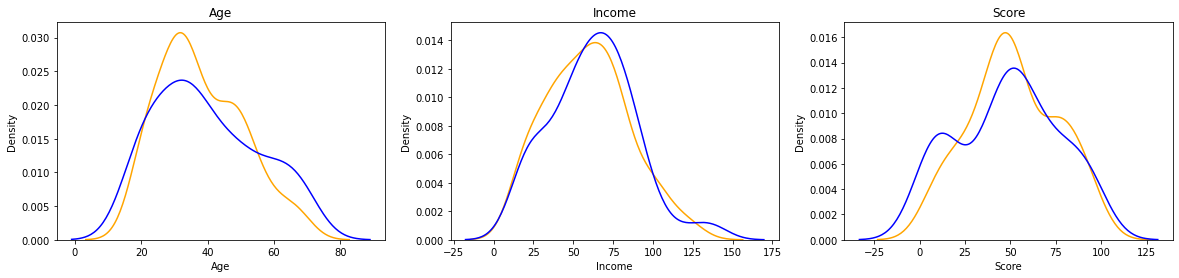

In [84]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df.Age[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.Age[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df.Income[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.Income[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Income')

plt.subplot(1,3,3)
sns.distplot(df.Score[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.Score[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Score')

plt.show()


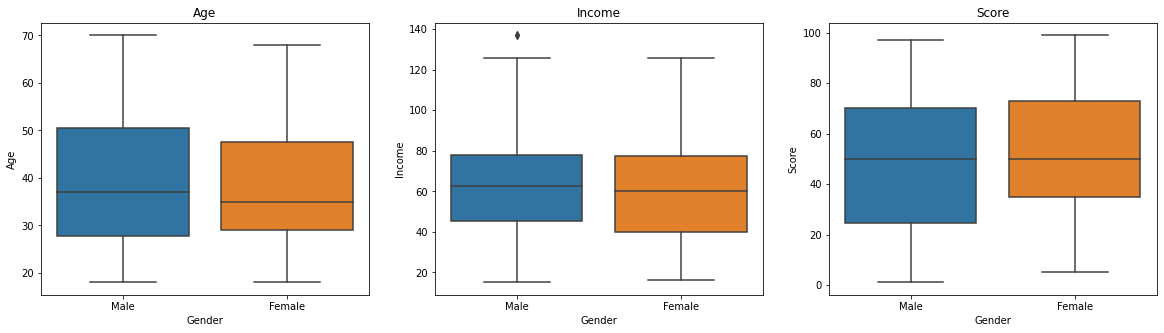

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df.Income)
plt.title('Income')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df.Score)
plt.title('Score')

plt.show()

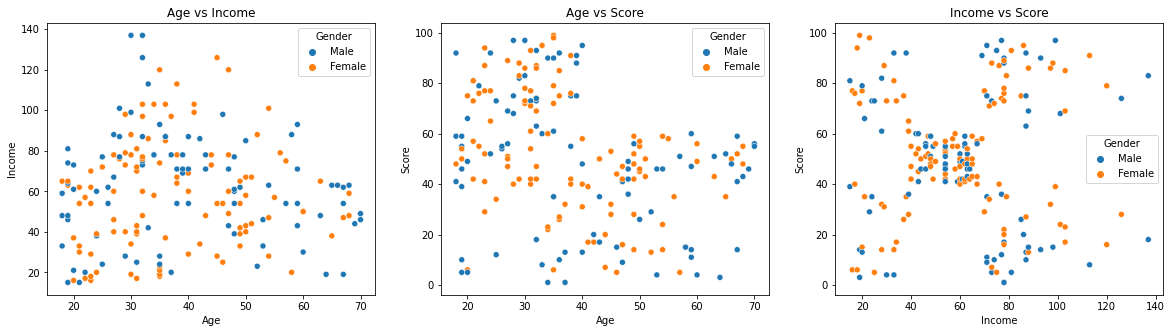

In [86]:
#Relation between variables
#Investigate if there is significant relation between variables, i.e. income increase with age or score decrease with age.


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df.Age, y=df.Income, hue=df.Gender)
plt.title('Age vs Income')

plt.subplot(1,3,2)
sns.scatterplot(x=df.Age, y=df.Score, hue=df.Gender)
plt.title('Age vs Score')

plt.subplot(1,3,3)
sns.scatterplot(x=df.Income, y=df.Score, hue=df.Gender)
plt.title('Income vs Score')

plt.show()

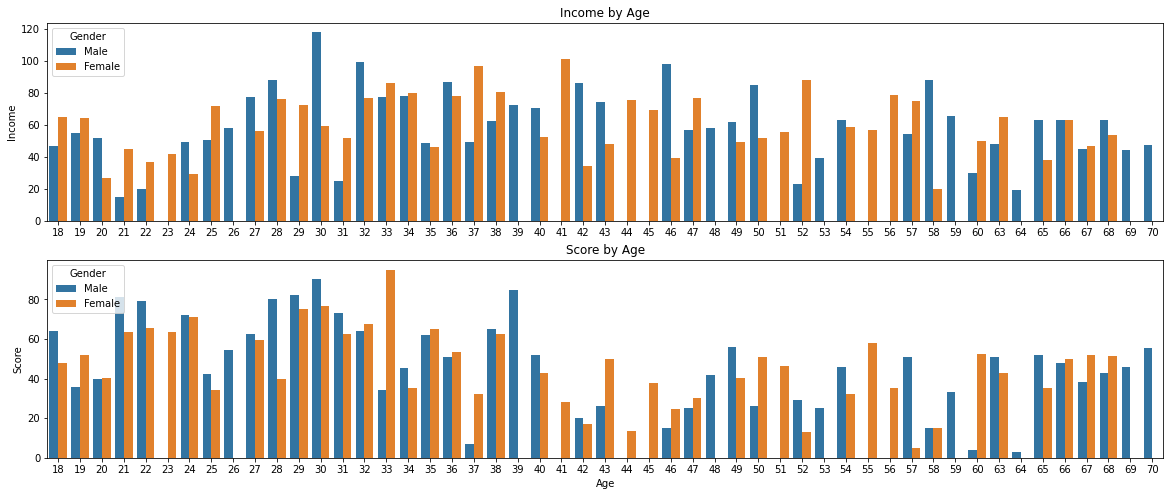

In [87]:
#Income & Score by Age

plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.barplot(x=df.Age, y=df.Income, hue=df.Gender, ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df.Age, y=df.Score, hue=df.Gender, ci=0)
plt.title('Score by Age')

plt.show()

In [88]:
#Data  Preparation
#Gender column will be encoded into 0/1 values, new dataframe will be created as well having age, income and score normalized. This is done just to compare if there will be any difference in elbow method, however all columns except age has pretty much same values so we should not see anything extreme here (values in range 0-100).


# one hot encoding, keeping just male column, so 1 = male, 0 = female
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)       #Thanks to Evan for suggestion
df

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [90]:
df=df.rename(columns={"Gender_Male":"Gender"})
df

,Age,Income,Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [94]:
#Data Transformed

df_t=df.copy()
ss=StandardScaler()

df_t['Age']=ss.fit_transform(df['Age'].values.reshape(-1,1))
df_t['Income']=ss.fit_transform(df['Income'].values.reshape(-1,1))
df_t['Score']=ss.fit_transform(df['Score'].values.reshape(-1,1))

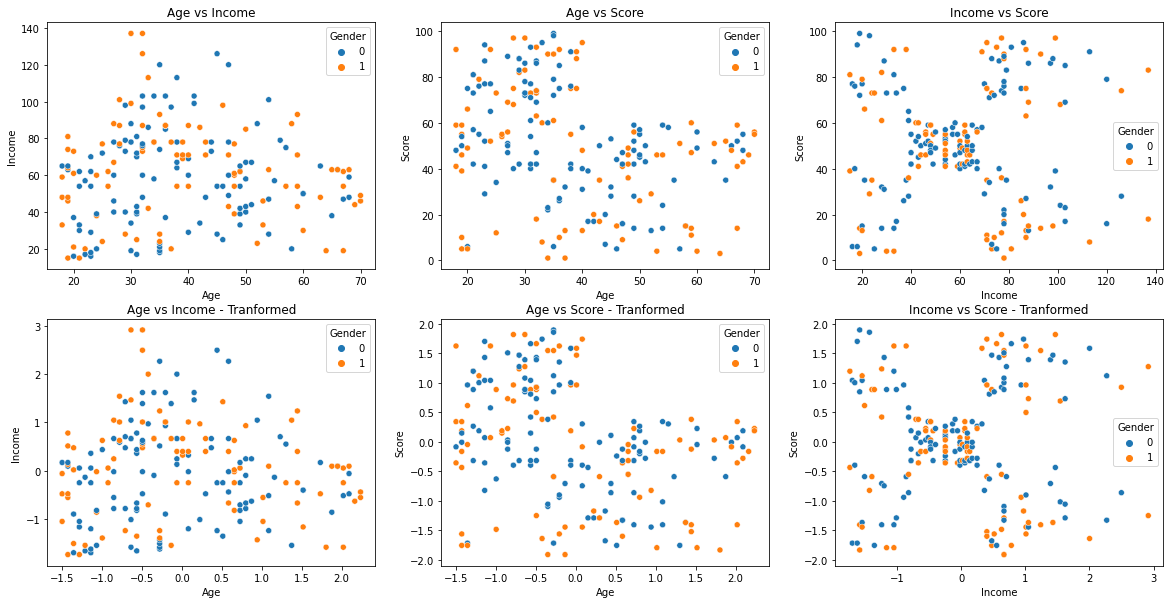

In [95]:

#Transformed vs Original
#We have found possible clustering on chart income vs score and age vs score. 
#Just quickly check how it looks like on normalized and raw data. Notice just axis ticks has changed and nothing else.


plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.scatterplot(x=df.Age, y=df.Income, hue=df.Gender)
plt.title('Age vs Income')

plt.subplot(2,3,2)
sns.scatterplot(x=df.Age, y=df.Score, hue=df.Gender)
plt.title('Age vs Score')

plt.subplot(2,3,3)
sns.scatterplot(x=df.Income, y=df.Score, hue=df.Gender)
plt.title('Income vs Score')

plt.subplot(2,3,4)
sns.scatterplot(x=df_t.Age, y=df_t.Income, hue=df_t.Gender)
plt.title('Age vs Income - Tranformed')

plt.subplot(2,3,5)
sns.scatterplot(x=df_t.Age, y=df_t.Score, hue=df_t.Gender)
plt.title('Age vs Score - Tranformed')

plt.subplot(2,3,6)
sns.scatterplot(x=df_t.Income, y=df_t.Score, hue=df_t.Gender)
plt.title('Income vs Score - Tranformed')

plt.show()

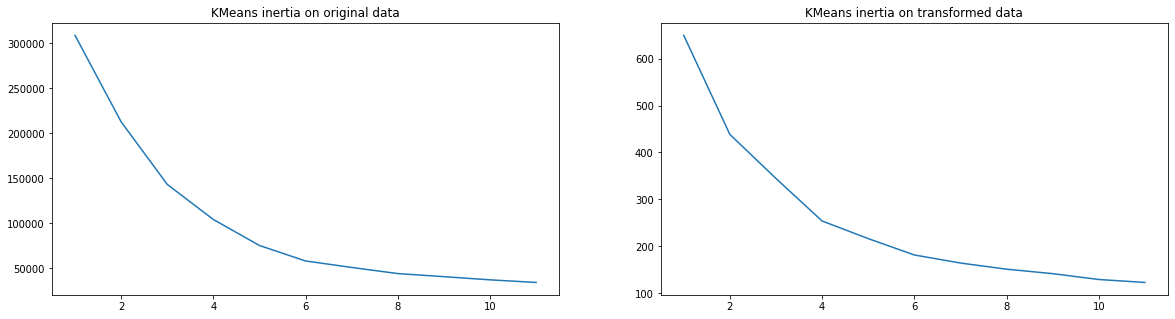

In [96]:
#Clustering using K-Means
#We'll see the indertia by using elbow methods

# untransformed data
inertia = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df)
    inertia.append(km.inertia_)

# transformed data
inertia_t = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df_t)
    inertia_t.append(km.inertia_)

# plot results
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(1,12), y=inertia)
plt.title('KMeans inertia on original data')

plt.subplot(1,2,2)
sns.lineplot(x=range(1,12), y=inertia_t)
plt.title('KMeans inertia on transformed data')

plt.show()

In [98]:

#Elbow results
#When looking on inertia for original data, 2, 3 and 5 seems to be our candidates for number of clusters. When looking on inertia in transformed data, 2 and 4 seems to be best... so we simply check how clustering looks like when using 2, 3, 4 and 5 clusters.

# collect cluster labels as well as cluster centers
clusters = [2,3,4,5]
cluster_centers = {}

for c in clusters:
    km = KMeans(n_clusters=c).fit(df[['Age', 'Income', 'Score', 'Gender']])
    df['cluster' + str(c)] = km.labels_
    cluster_centers[str(c)] = km.cluster_centers_

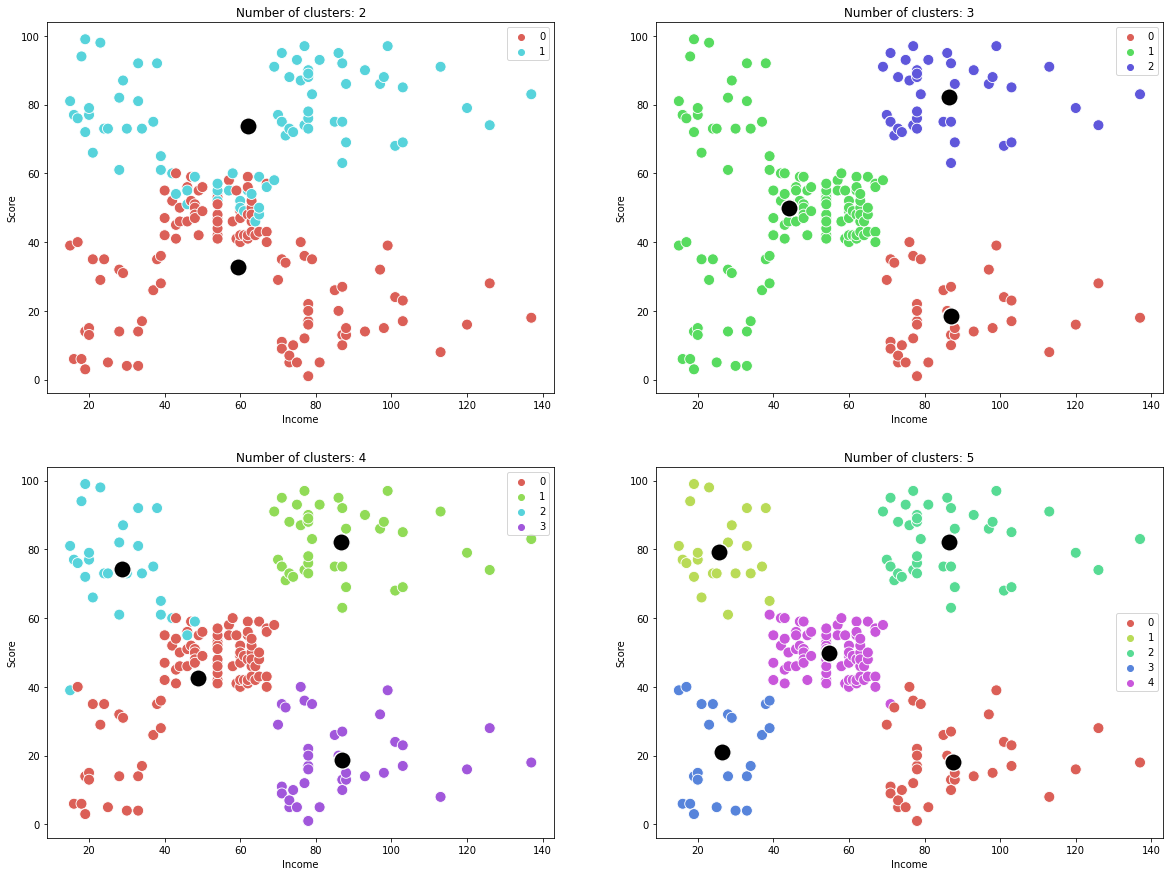

In [99]:
#Checking the Cluster


plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(df.Income, df.Score, df['cluster' + str(c)], s=120, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,1], cluster_centers[str(c)][:,2], color='black', s=300)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

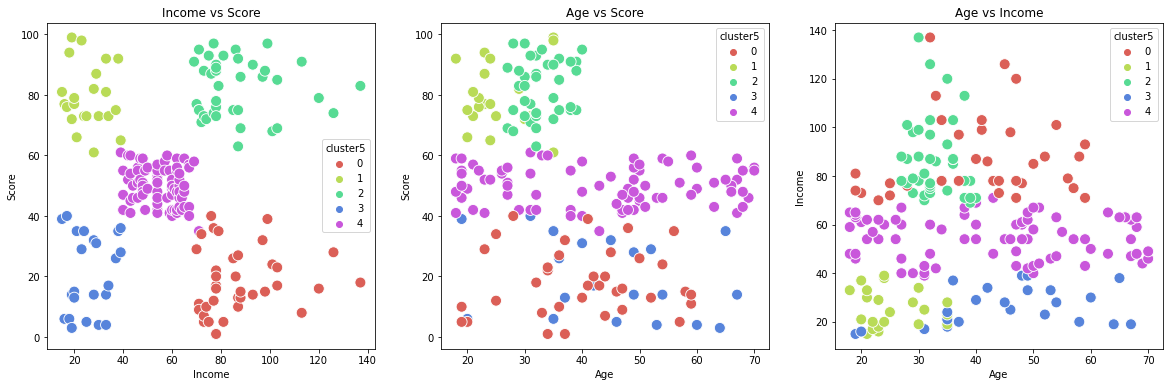

In [100]:
#Draw The Winning Cluster

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(df.Income, df.Score, df['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Income vs Score')
   
plt.subplot(1,3,2)
sns.scatterplot(df.Age, df.Score, df['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Age vs Score')

plt.subplot(1,3,3)
sns.scatterplot(df.Age, df.Income, df['cluster5'], s=120, palette=sns.color_palette("hls", 5))
plt.title('Age vs Income')

plt.show()

In [ ]:

Conclusion

We have selected to have 5 clusters, meaning 5 customer groups. But who are people in these groups? Let's try to describe them for marketing team!

    Poor and not-spender - customers with low income and low spending score (cluster #4)
    Poor and spender - customers with low income, but spending a lot (cluster #1)
    Neutral - customers with mid income and mid spending score (cluster #0)
    Rich and not-spender - customers with high income and low spending score (cluster #2)
    Rich and spender - customers with high income and high spending score (cluster #3)

